# 回帰分析

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import stats
import statsmodels.formula.api as smf
from IPython.display import display

%precision 3

'%.3f'

In [3]:
df = pd.read_csv('../data/ch12_scores_reg.csv')
n = len(df)
print(f'標本の大きさ: {n}')
df.head()

標本の大きさ: 20


,小テスト,期末テスト,睡眠時間,通学方法
0,4.2,67,7.2,バス
1,7.2,71,7.9,自転車
2,0.0,19,5.3,バス
3,3.0,35,6.8,徒歩
4,1.5,35,7.5,徒歩


## 単回帰Model

#### 回帰分析（regression analysis）
因果関係が疑われる複数の変数を使って、ある変数から他の変数の値を予測する手法。

#### 説明変数（explanatory variable） or 独立変数（independent variable）
回帰分析を行なとき原因となる変数のこと。

#### 応答変数（response variable） or 従属変数（dependent variable）
回帰分析を行うときの結果となる変数のこと。

### 単回帰Model（simple regression model）
回帰分析において説明変数と応答変数が１つずつの最も単純な Model のこと。


- 応答変数: 期末Test
- 説明変数: 小Test の平均点

とする単回帰Model の回帰分析を行なう

In [4]:
# 単回帰分析の準備
x = np.array(df['小テスト'])  # 説明変数: 小Test の平均点
y = np.array(df['期末テスト'])  # 応答変数: 期末Test の点数
p = 1  # 説明変数の数

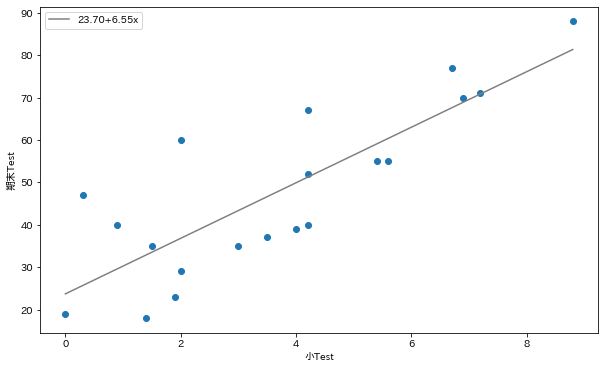

In [5]:
# この２次元 Data に対して散布図と回帰直線を描画してみる
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('小Test')
ax.set_ylabel('期末Test')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

単回帰分析では、この回帰直線を求めることが１つの目標になる。

### 回帰分析における仮説
単回帰分析では、説明変数 x と応答変数 y の間に次のような関係性を仮定する。

```
y = β0 + β1 * x
```

#### 誤差項（error term）
基本的な関係は直線上にあると考え、他の要因については予測できない確率的なものだと考え、その予測できない部分のこと。

他、２つを仮定する
- 説明変数は確率変数ではない
- εi は互いに独立に N(0, σ**2) にに従う

#### 回帰直線（regression line）
母数 β0 と β1 を推定値から作られる直線

#### 回帰係数（regression coefficient）
回帰直線の係数（母数 β0 と β1 の推定値）

## statsmodels による回帰分析

In [6]:
formula = '期末テスト~小テスト'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           8.59e-06
Time:                        22:12:27   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.0

分析結果の各項目が何を示しているかを理解するため二重線によって区切られている範囲ごとに`NumPy`, `SciPY` を使用して確認していく。
- Model の概要と Data への Model の適合度
- 回帰係数の推定結果
- Model に課した誤差項が正規分布に従っているという仮定の妥当性

## 回帰係数

In [19]:
"""
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト         6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
"""
print()

#### 行方向の用語の意味
- Intercept: 切片 β0
- 小テスト : 傾き β1

#### 列報告の用語の意味
- coef: 回帰係数の推定値
- std err: 推定値の標準誤差
- t: 回帰係数に関する t 検定統計量
- p>|t|: t 検定統計量のｐ値
- \[0.025      0.975]: 回帰係数の95%信頼区間

### 点推定
coef に出力されている回帰係数の推定値を実際に求めていく

- 予測値（predicted vaue）: xi から予測した Model の予測値
- 残差（residual）: 実際の Data と予測値の差
- 残差二乗和（RSS: residual sum of squares）: 残差の二乗和
- 最小二乗法（ordinary least squares）: 残差二乗和の最小化によって、回帰係数の推定値を求める方法のこと。最小二乗法によって求められた回帰係数の推定値は実際の回帰係数の不偏一致推定量となることが知られている。

In [8]:
# １列目が全部１で、２列目が x となっている行列 X を作る
X = np.array([np.ones_like(x), x]).T
display(X)

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [9]:
# 最小二乗法を実行し、回帰係数の推定値を求める
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
print(f'回帰係数の推定値: {beta0_hat:.3f}, {beta1_hat:.3f}')

回帰係数の推定値: 23.699, 6.554


In [10]:
# 予測値と残差を計算する
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

残差は誤差項に対応しているため、残差の分散から母分散を推定できる。
ただし残差の自由度は回帰係数の数+1だけ減る

In [11]:
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.290

### 区間推定
- 回帰係数 β0 と β1 の区間推定を行なうためには推定値の標準誤差が必要。
- 標準誤差は、NumPy で求めることができる

In [12]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [15]:
print('標準誤差')
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

標準誤差


(4.714, 1.069)

標準誤差から区間推定を行なう。
- σ**2 の自由度が n-2
- 自由度 n-2 のｔ分布を使って求める

In [16]:
# β0 の95%信頼区間
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)

print('β0 の95%信頼区間')
lcl, hcl

β0 の95%信頼区間


(13.796, 33.603)

In [17]:
# β1 の95%信頼区間
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)

print('β1 の95%信頼区間')
lcl, hcl

β1 の95%信頼区間


(4.309, 8.799)

`statsmodels` の分析結果と一致している

In [18]:
"""
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト         6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
"""
print()

### ｔ検定
回帰係数についての仮説検定を考える
- 帰無仮説: β1 = 0
- 対立仮説: β1 != 0

In [22]:
# 検定統計量を求める
t = beta1_hat / np.sqrt(s_var * C1)
print('仮説検定においての検定統計量')
t

仮説検定においての検定統計量


6.133

In [25]:
# ｐ値を求める
print('ｐ値')
(1 - rv.cdf(t)) * 2

ｐ値


0.000

帰無仮説は棄却され、小Test の平均点と期末Test の点数に因果関係がある、といえそうである。

β0 の仮説検定
- 帰無仮説: β0 = 0
- 対立仮説: β0 != 0

In [26]:
t = beta0_hat / np.sqrt(s_var * C0)
print('仮説検定の統計検定量')
t

仮説検定の統計検定量


5.028

In [27]:
print('ｐ値')
(1 - rv.cdf(t)) * 2

ｐ値


0.000

statsmodels の分析結果と一致

In [28]:
"""
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト         6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
"""
print()

## 重回帰 Model（multiple regression model）
説明変数が複数ある Model のこと

In [30]:
# statsmodels で回帰分析を行なう
formula = '期末テスト~小テスト+睡眠時間'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  期末テスト   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           6.19e-06
Time:                        04:21:09   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.8

## 回帰係数
重回帰Model における回帰係数を NumPy で求めていく

In [31]:
x1 = df['小テスト']
x2 = df['睡眠時間']
y = df['期末テスト']
p = 2

β0, β1, β2 の推定値を求める

In [35]:
# １列目が全部１で、２列目が x1, ３列目が x2 となる行列 X を作成
X = np.array([np.ones_like(x1), x1, x2]).T
# 最小二乗法を実行する
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
print('回帰係数の推定値')
beta0_hat, beta1_hat, beta2_hat

回帰係数の推定値


(-1.871, 6.429, 4.192)

回帰係数の推定値を使用して、予測値と残差を求める

In [38]:
# 予測値
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

標準誤差を求める

In [41]:
s_var = np.sum(eps_hat **2) / (n-p-1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

上記を使用して、β2（睡眠時間の回帰係数）の95%信頼区間を求める

In [46]:
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
print('睡眠時間の95%信頼区間')
lcl, hcl

睡眠時間の95%信頼区間


(0.440, 7.943)

In [47]:
"""
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
小テスト        6.4289      0.956      6.725      0.000       4.412       8.446
睡眠時間        4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
"""
print()

statsmodels の結果と一致していることを確認

### ダミー変数（dummy variable）
質的変数を量的変数と同様に扱えるようにする手法
- 0 と 1 をとる２値変数
- 変換したい質的変数の Category数から１つ減らした数だけ必要になる。

In [48]:
# statsmodels で回帰分析を行なう（statsmodels は質的変数を自動で Dummy変数化してくれる)
formula = '期末テスト~小テスト+睡眠時間+通学方法'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  期末テスト   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           7.47e-05
Time:                        04:50:41   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4788     12.068     -0.040      